<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/matusiak/regresja2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

In [7]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y  = pd.DataFrame(housing.target, columns=housing.target_names)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# liniowa
model1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('linear', LinearRegression(fit_intercept=True))
])

model1.fit(X_train, y_train)

score1 = model1.score(X_test, y_test)
print("Wynik:", score1)

Wynik: 0.5757877060324512


In [17]:
# wielomianowa 2 st
model2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression(fit_intercept=True))
])

model2.fit(X_train, y_train)

score2 = model2.score(X_test, y_test)
print("Wynik:", score2)

Wynik: 0.6456819713278688


In [18]:
# wielomianowa 3 st
model3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression(fit_intercept=True))
])

model3.fit(X_train, y_train)

score3 = model3.score(X_test, y_test)
print("Wynik:", score3)


Wynik: -18.38870805852368


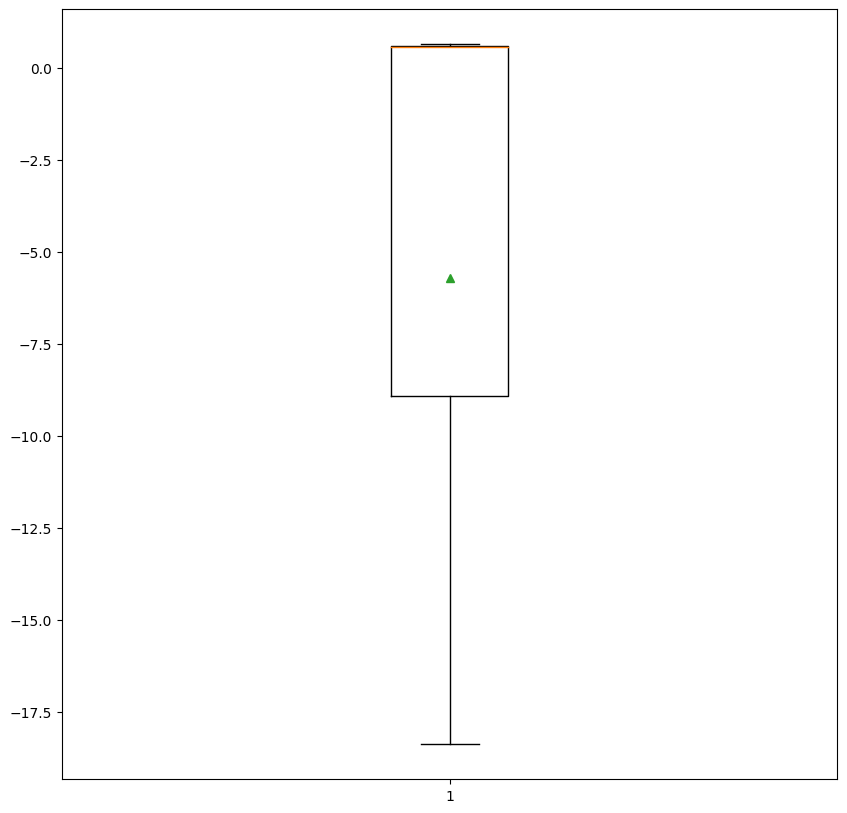

In [19]:
plt.figure(figsize=(10, 10))
plt.boxplot([score1,score2,score3], showmeans=True)
plt.show()